In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
gp=pd.read_csv("C:\\Users\\Sathya Sai\\Downloads\\googleplaystore.csv")

In [3]:
user=pd.read_csv("C:\\Users\\Sathya Sai\\Downloads\\googleplaystore_user_reviews.csv")

In [4]:
gp.sample(n=2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4866,"Abs, Core & Back Workout Challenge",HEALTH_AND_FITNESS,4.8,3908,33M,"100,000+",Free,0,Everyone,Health & Fitness,"July 9, 2018",1.5.8,4.1 and up
3627,Weather forecast,WEATHER,4.8,159455,10M,"1,000,000+",Free,0,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up


In [5]:
user.sample(n=2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
6248,Alto's Adventure,"Simply brilliant, game pure simplicity relaxin...",Positive,0.040536,0.509167
58685,HD Widgets,NaN,NaN,NaN,NaN


In [6]:
print(gp.shape)
print(user.shape)

(10841, 13)
(64295, 5)


In [169]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10098 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10098 non-null  object 
 1   Category        10098 non-null  object 
 2   Rating          10098 non-null  float64
 3   Reviews         10098 non-null  object 
 4   Size            10098 non-null  object 
 5   Installs        10097 non-null  float64
 6   Type            10097 non-null  object 
 7   Price           10098 non-null  object 
 8   Content Rating  10098 non-null  object 
 9   Genres          10098 non-null  object 
 10  Last Updated    10098 non-null  object 
 11  Current Ver     10098 non-null  object 
 12  Android Ver     10098 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


# DATA CLEANING

In [7]:
gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
user.isna().sum() #Data is Missing Completely at random

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [14]:
gp=gp[~gp["Current Ver"].isna()]

In [15]:
gp=gp[~gp["Android Ver"].isna()]

In [81]:
gp["Rating"].fillna(np.round(gp["Rating"].mean(),1),inplace=True)

In [ ]:
#PROCESSING INSTALLS REMOVING '+' AND ',' TO CONVERT TO INT

In [109]:
gp["Installs"]=pd.to_numeric(gp["Installs"].str.replace(",","").str[:-1])

<AxesSubplot:>

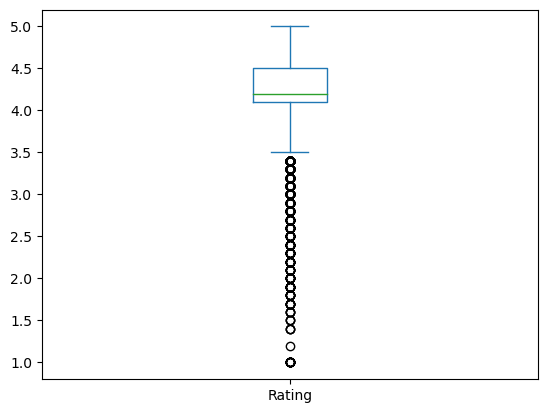

In [82]:
gp["Rating"].plot(kind='box')

<AxesSubplot:xlabel='Rating', ylabel='Category'>

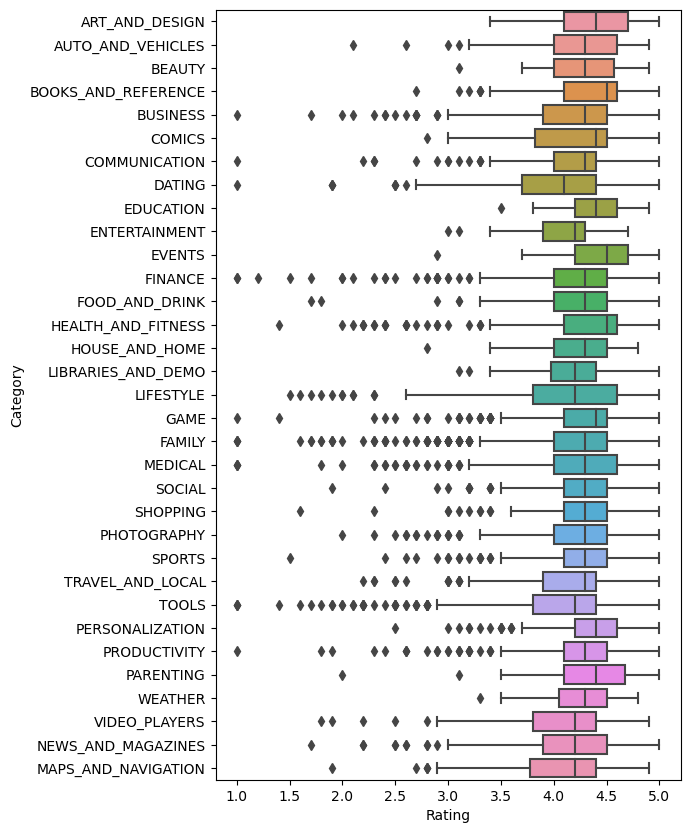

In [78]:
plt.figure(figsize=(6,10))
sns.boxplot(y="Category",x="Rating",data=gp)

# OUTLIER REMOVAL

In [116]:
gp=gp[(gp["Rating"]>q1-1.5*IQR) & (gp["Rating"]<q3+1.5*IQR)]

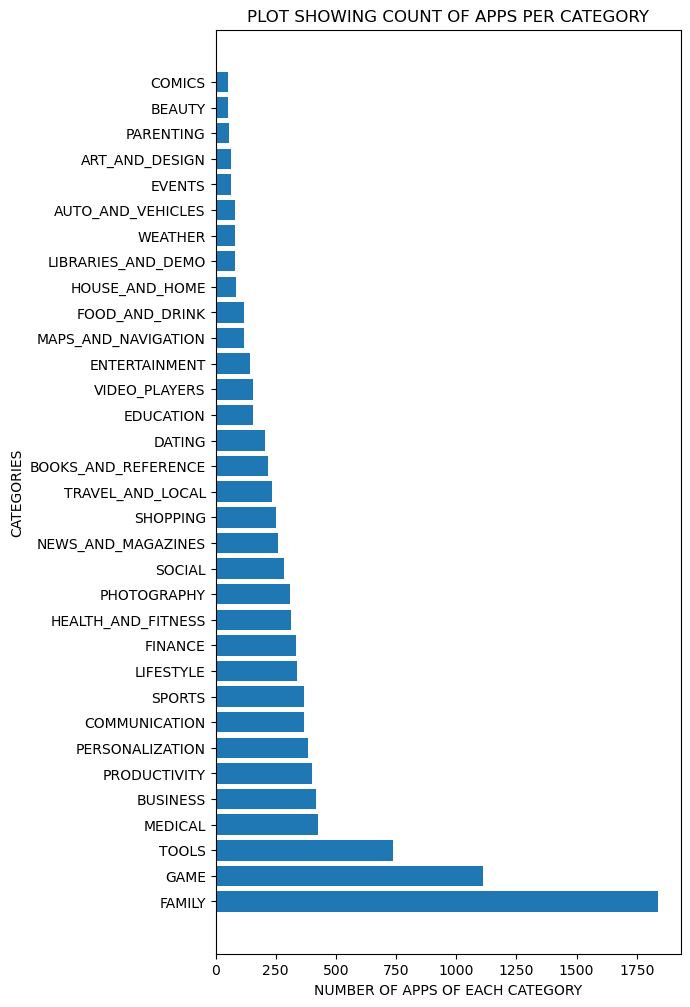

In [164]:
plt.figure(figsize=(6,12))
plt.barh(gp["Category"].value_counts().index,gp["Category"].value_counts())
plt.title("PLOT SHOWING COUNT OF APPS PER CATEGORY")
plt.xlabel("NUMBER OF APPS OF EACH CATEGORY")
plt.ylabel("CATEGORIES")
plt.show()

WE CAN SEE THAT MOST NUMBER OF APPS ON GOOGLE PLAY ARE OF FAMILY CATEGORY FOLLOWED BY GAME.

In [137]:
gp.groupby("Category").sum().index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [157]:
np.array(np.log10(gp.groupby("Category").sum()["Installs"]).values).astype(int)

array([ 8,  7,  7,  9,  8,  7, 10,  8,  8,  9,  7, 10,  8,  8, 10,  9,  8,
        7,  8,  8,  7,  9,  7,  9, 10, 10,  9, 10,  9, 10,  9,  9,  8])

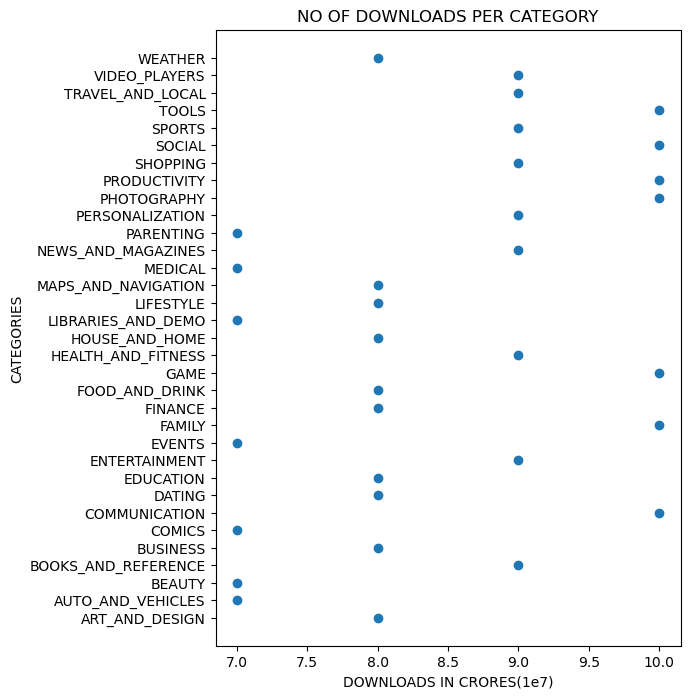

In [163]:
plt.figure(figsize=(6,8))
plt.scatter(np.array(np.log10(gp.groupby("Category").sum()["Installs"]).values).astype(int),gp.groupby("Category").sum().index)
plt.title("NO OF DOWNLOADS PER CATEGORY")
plt.xlabel("DOWNLOADS IN CRORES(1e7)")
plt.ylabel("CATEGORIES")
plt.show()

SOCIAL,FAMILY,GAME,COMMUNICATION AND TOOLS  ARE DOWNLOADED MOST

In [212]:
# Processing Reviews Column

In [170]:
gp["Reviews"]=gp["Reviews"].astype(int)

In [ ]:
# Processing Size Column 

In [201]:
gp["Size"]=gp["Size"].replace("Varies with device",np.NaN)#,axis=0,inplace=True)

In [204]:
gp["Size"]=pd.to_numeric(gp["Size"].str[:-1],downcast='float')

In [208]:
gp["Size"].fillna(np.round(gp["Size"].mean(),1),inplace=True)

In [211]:
gp["Size"]=gp["Size"].apply(lambda x: np.round(x,1))

Text(0.5, 0, 'SIZE IN MB')

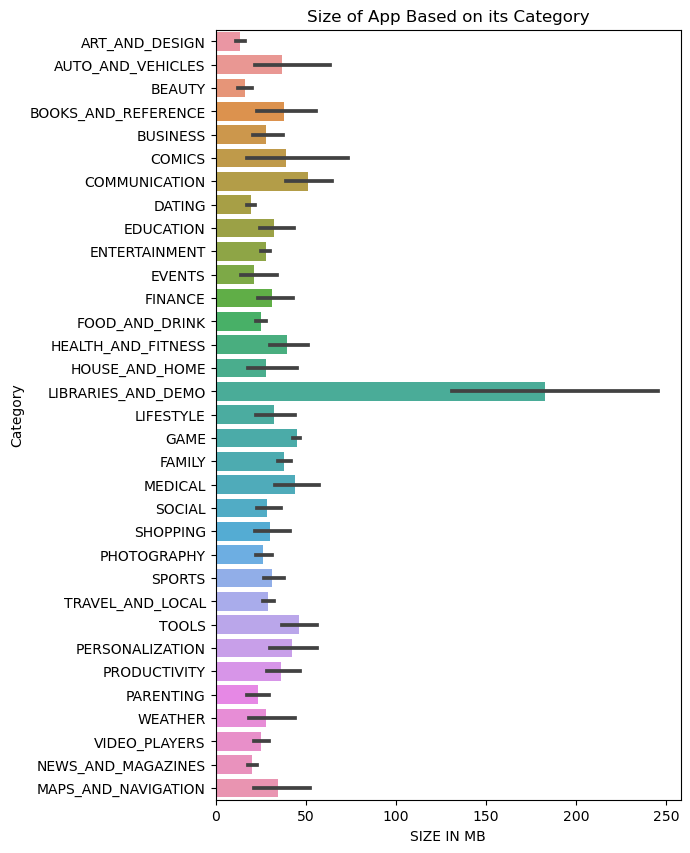

In [228]:
plt.figure(figsize=(6,10))
sns.barplot(y=gp["Category"],x=gp["Size"],orient='h')
plt.title('Size of App Based on its Category')
plt.xlabel('SIZE IN MB')

LIBRARIES AND DEMO CATEGORY APP REQUIRES MORE SIZE FOLLOWED BY COMMUNICATION,MEDICAL

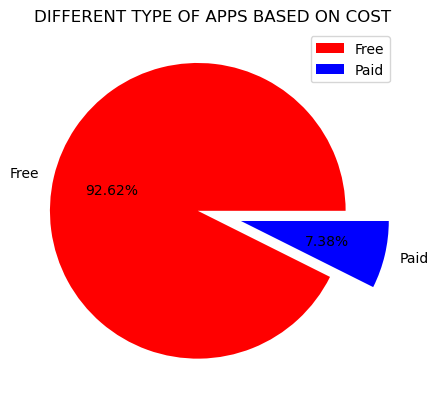

In [324]:
plt.pie(gp["Type"].value_counts(),labels=gp.groupby('Type').count().index,autopct='%.2f%%',explode=[0.1,0.2],colors=['r','b'])
plt.title('DIFFERENT TYPE OF APPS BASED ON COST')
plt.legend()
plt.show()

In [ ]:
#MOST OF THE APPS ARE FREE OF COST

In [256]:
categories=gp[gp["Type"]=='Paid'].groupby('Category').count().index

In [286]:
values=pd.DataFrame((gp[gp["Type"]=='Paid'].groupby('Category').count()).sort_values(by='App',ascending=False)["App"])#.rename(columns={'App':'Count'},inplace=True)
values.rename(columns={'App':'Count'},inplace=True)

Text(0, 0.5, 'Categories')

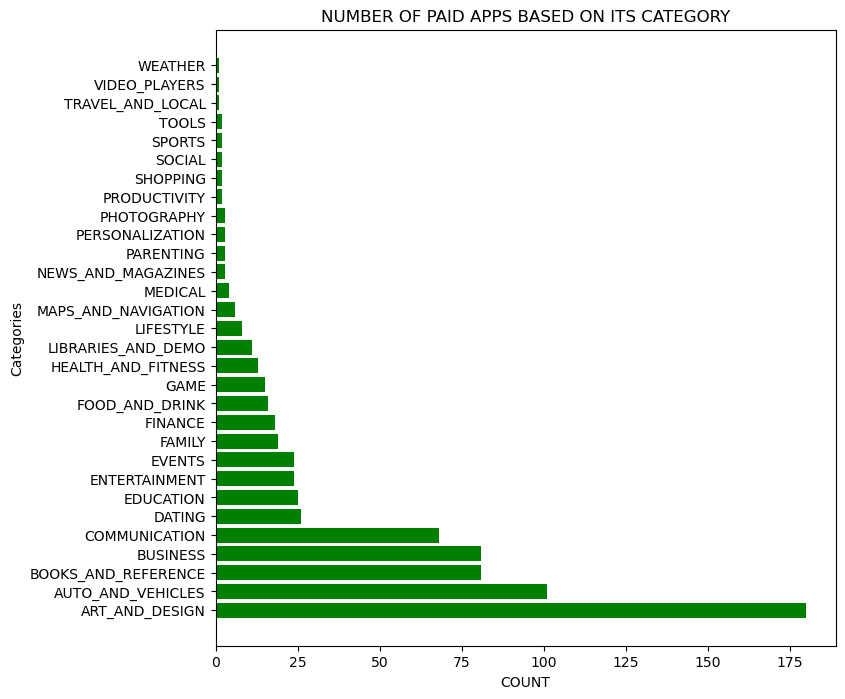

In [325]:
plt.figure(figsize=(8,8))
plt.barh(categories,values["Count"],color='g')#.plot(kind='barh')
plt.title('NUMBER OF PAID APPS BASED ON ITS CATEGORY')
plt.xlabel('COUNT')
plt.ylabel('Categories')

In [ ]:
#ART AND DESIGN

In [ ]:
# GENRES COLUMN

In [310]:
indexes=gp.groupby("Genres").count().sort_values(by="App",ascending=False).index[:10]

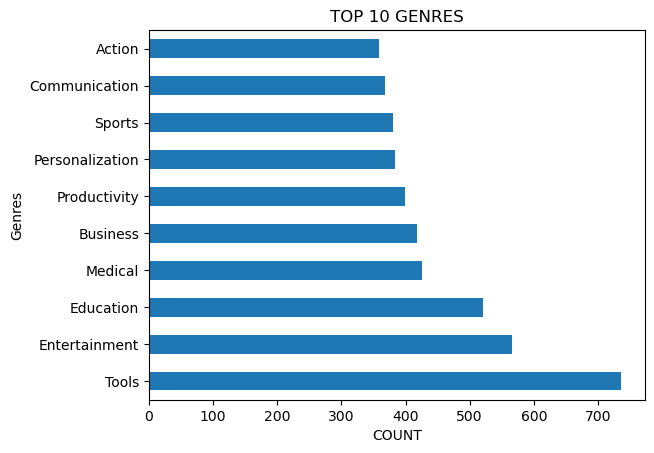

In [318]:
gp.groupby("Genres").count().sort_values(by="App",ascending=False).loc[indexes,'App'].plot(kind='barh')
plt.title('TOP 10 GENRES')
plt.xlabel('COUNT')
plt.ylabel('Genres')
plt.show()

In [ ]:
#REVIEWS COLUMN

In [333]:
new=(gp.groupby("Genres").sum()).sort_values(by="Reviews",ascending=False).index[:10]

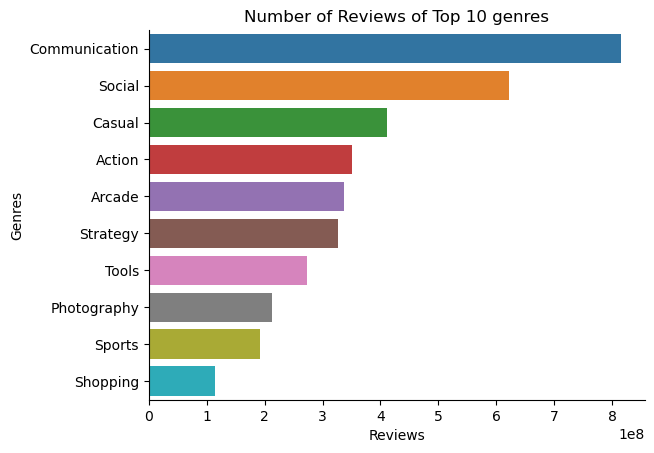

In [352]:
sns.barplot(y=new,x=gp.groupby("Genres").sum().sort_values(by="Reviews",ascending=False).loc[new,'Reviews'],orient='h')
plt.title('Number of Reviews of Top 10 genres')
sns.despine()

In [361]:
#CONTENT COLUMN

In [356]:
label_s=gp["Content Rating"].value_counts().index
vals=gp["Content Rating"].value_counts()

Text(0.5, 1.0, 'TYPES OF CONTENT')

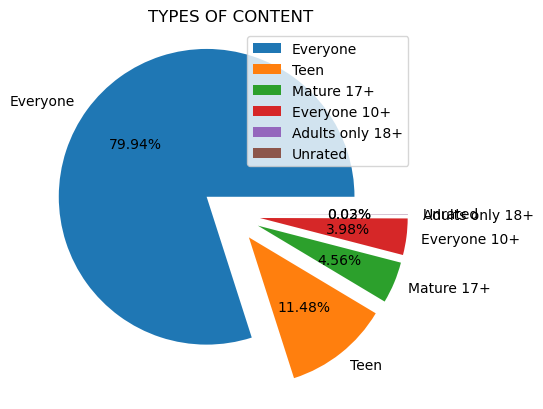

In [360]:
plt.pie(vals,labels=label_s,autopct='%.2f%%',explode=[0.2,0.2,0.2,0.2,0.2,0.2])
plt.legend()
plt.title('TYPES OF CONTENT')

In [ ]:
#MOST OF THE APPS ARE USER FRIENDLY

In [ ]:
#PROCESSING "Last Updated" COLUMN 

In [363]:
gp["Last Updated"]=pd.to_datetime(gp["Last Updated"])

In [366]:
gp["Last Updated Year"]=gp["Last Updated"].dt.year

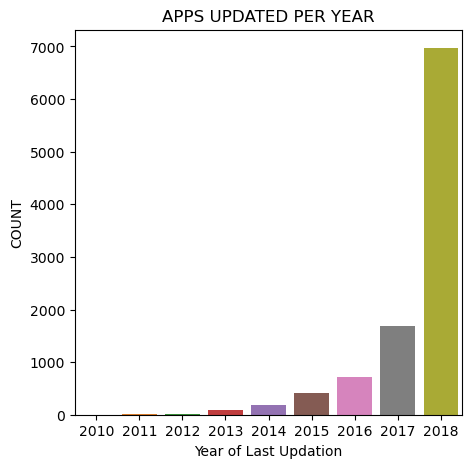

In [398]:
plt.figure(figsize=(5,5))
sns.barplot(y=gp["Last Updated Year"].value_counts(),x=gp["Last Updated Year"].value_counts().index)
plt.title('APPS UPDATED PER YEAR')
plt.xlabel('Year of Last Updation')
plt.ylabel('COUNT')
plt.show()